In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()




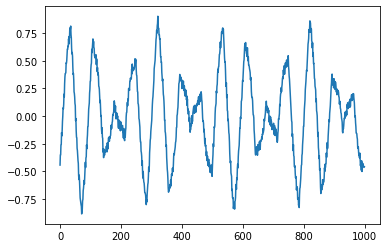

In [92]:
plt.plot(d1.transpose())

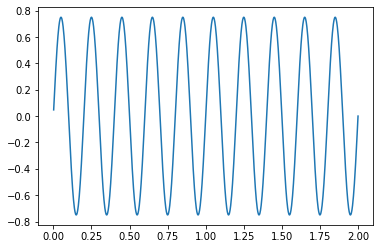

In [83]:
plt.plot(t, x)

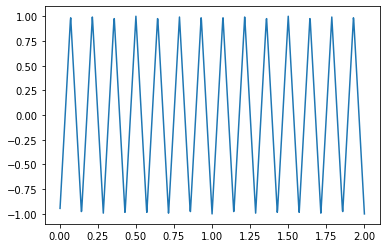

In [84]:
plt.plot(t, y)

In [93]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X

array([[-0.4428562 , -0.3512489 , -0.35052213, ..., -0.46139352,
        -0.46342868, -0.45793656],
       [-0.1577465 , -0.05866276, -0.03800352, ..., -0.26564857,
        -0.23184236, -0.14628662],
       [-0.66330658, -0.55233816, -0.55040051, ..., -0.64753576,
        -0.66606372, -0.67674457],
       [ 0.42866788,  0.39671932,  0.47865013, ...,  0.46058224,
         0.51436128,  0.53390862],
       [-0.19423291, -0.08093446,  0.2265593 , ..., -0.10137235,
         0.18921389, -0.14213298]])

In [7]:
U,S,V = np.linalg.svd(X)
S

array([20.90664088, 14.25240868,  5.40925926,  1.47392542,  0.95534294])

In [8]:
eigen = S**2
eigen

array([437.0876329 , 203.13115315,  29.26008572,   2.17245616,
         0.91268013])

In [9]:
eigen

array([437.0876329 , 203.13115315,  29.26008572,   2.17245616,
         0.91268013])

In [10]:
for i in range(5):
    V[:,i] = V[:,i] * np.sqrt(eigen[i])



In [11]:
eigen = eigen/N
eigen = eigen/sum(eigen)

In [12]:
eigen

array([0.64988258, 0.30202501, 0.04350528, 0.00323011, 0.00135702])

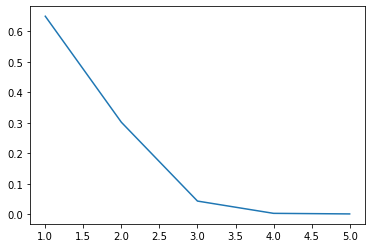

In [13]:
plt.plot(range(1,6), eigen)

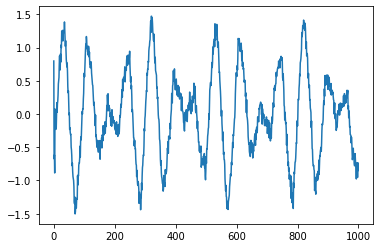

In [14]:

plt.plot(V[:,0])
plt.show()

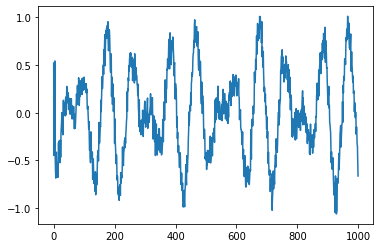

In [15]:
plt.plot(V[:,1])
plt.show()

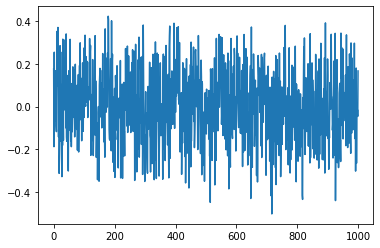

In [16]:
plt.plot(V[:,2])
plt.show()

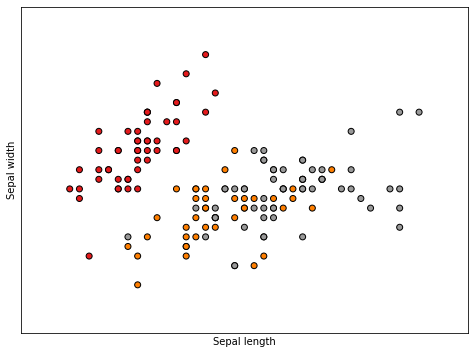

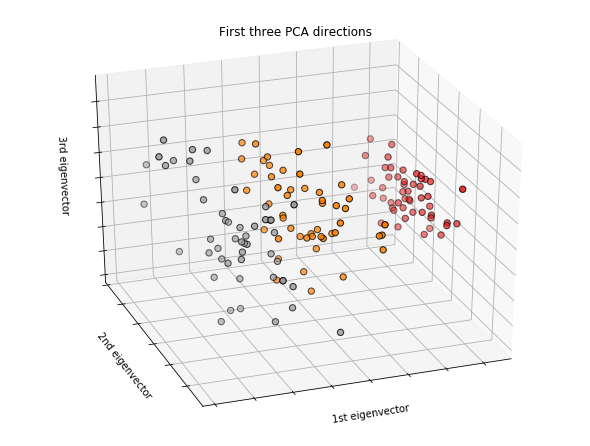

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [95]:
iris = datasets.load_iris()
X = iris.data[:50,:] 

In [96]:
X2 = X +100*np.random.rand(50,4)

In [97]:
X_combined = np.zeros((50,8))

In [98]:
X_combined[:,0:4] = X
X_combined[:,4:] = X2

In [99]:
X_combined

array([[5.10000000e+00, 3.50000000e+00, 1.40000000e+00, 2.00000000e-01,
        5.54354350e+00, 3.75120950e+01, 1.09795225e+01, 5.46540167e+01],
       [4.90000000e+00, 3.00000000e+00, 1.40000000e+00, 2.00000000e-01,
        9.70883181e+01, 4.74123090e+01, 9.49936152e+01, 8.19955392e+01],
       [4.70000000e+00, 3.20000000e+00, 1.30000000e+00, 2.00000000e-01,
        9.02587340e+01, 1.63064308e+01, 7.73408831e+01, 3.53878251e+01],
       [4.60000000e+00, 3.10000000e+00, 1.50000000e+00, 2.00000000e-01,
        5.31989093e+01, 3.95150014e+01, 1.99546674e+01, 3.67805974e+00],
       [5.00000000e+00, 3.60000000e+00, 1.40000000e+00, 2.00000000e-01,
        1.00853932e+02, 3.00806839e+01, 5.31418873e+01, 4.48496436e+01],
       [5.40000000e+00, 3.90000000e+00, 1.70000000e+00, 4.00000000e-01,
        1.31670146e+01, 5.29626753e+01, 4.57404336e+01, 7.30513733e+00],
       [4.60000000e+00, 3.40000000e+00, 1.40000000e+00, 3.00000000e-01,
        8.61271964e+01, 8.36991357e+01, 3.15025795e+01, 5.

In [100]:
X_combined.mean(axis=0)

array([ 5.006     ,  3.428     ,  1.462     ,  0.246     , 54.21055703,
       53.49055281, 51.35978257, 51.88393506])

In [101]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled  

array([[ 0.26938189,  0.19186974, -0.36063582, -0.44092382, -1.59064776,
        -0.64159772, -1.35347983,  0.09746914],
       [-0.30377107, -1.14055903, -0.36063582, -0.44092382,  1.40143003,
        -0.24406532,  1.46253422,  1.05951835],
       [-0.87692403, -0.60758752, -0.9423065 , -0.44092382,  1.17820979,
        -1.49308828,  0.87084371, -0.5804384 ],
       [-1.16350052, -0.87407328,  0.22103486, -0.44092382, -0.03306501,
        -0.56117318, -1.05264775, -1.69619025],
       [-0.01719459,  0.4583555 , -0.36063582, -0.44092382,  1.52450654,
        -0.93999801,  0.05973322, -0.24751125],
       [ 1.12911134,  1.25781276,  1.38437621,  1.47613628, -1.34147986,
        -0.02119635, -0.18835132, -1.56856652],
       [-1.16350052, -0.07461601, -0.36063582,  0.51760623,  1.04317333,
         1.21299304, -0.66558075,  0.02015745],
       [-0.01719459, -0.07461601,  0.22103486, -0.44092382, -0.21059938,
         0.8596641 , -1.18897166, -0.46342936],
       [-1.73665348, -1.40704478

In [102]:
X_scaled.mean(axis=0)

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
        4.84057239e-16, -5.32907052e-17, -4.17443857e-16, -4.62546668e-16])

In [103]:
U,S,V = np.linalg.svd(X_scaled)
S

array([10.34091537,  8.64603832,  7.77318145,  7.16864535,  6.2127175 ,
        5.5028569 ,  5.0980656 ,  3.41029308])

In [104]:
eigen = S**2
eigen

array([106.93453073,  74.75397868,  60.42234992,  51.38947609,
        38.59785874,  30.28143405,  25.99027291,  11.63009889])

In [105]:
eigen = eigen/50
eigen = eigen/sum(eigen)

In [106]:
eigen = np.round(eigen*100)/100

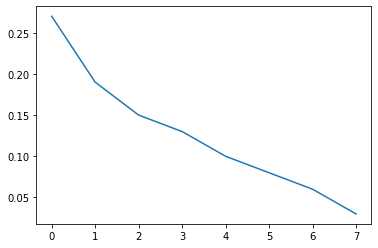

In [107]:
plt.plot(eigen)

In [31]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

<IPython.core.display.Javascript object>


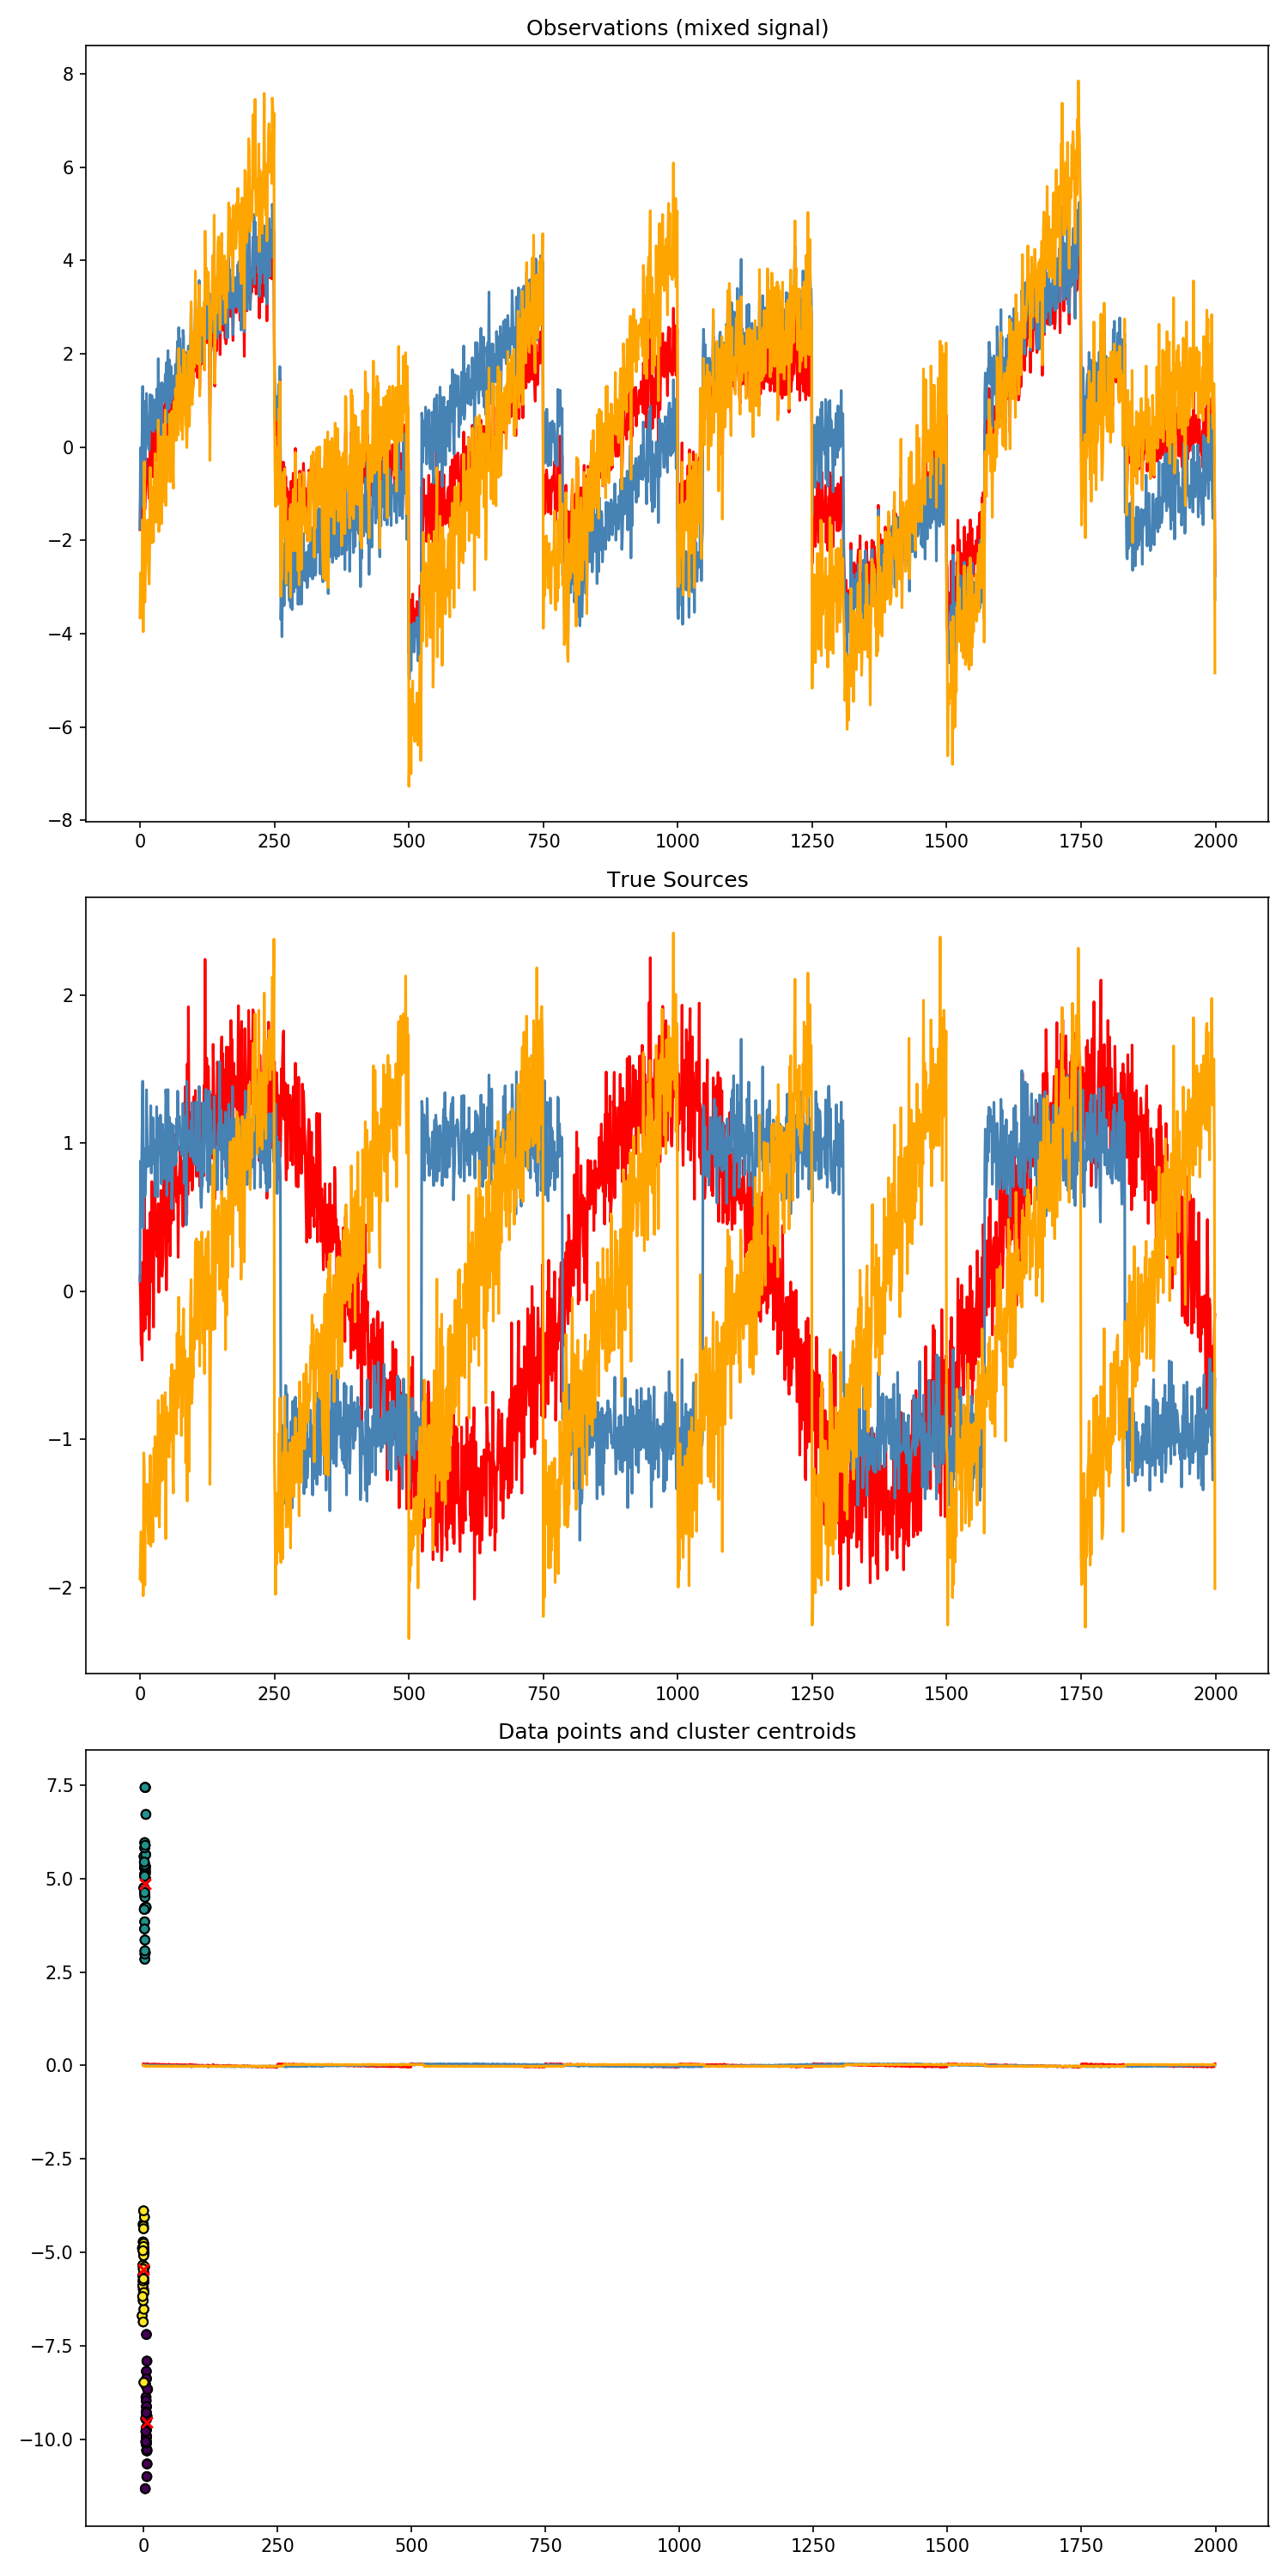

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed = 0
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# #############################################################################
# Plot results

plt.figure(figsize=(10,20))

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',]
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()
plt.show()

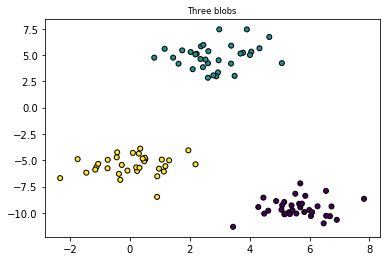

In [55]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

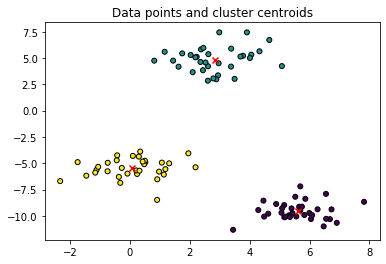

In [59]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [4]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [5]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [60]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
print(data.DESCR)
data.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

array(['malignant', 'benign'], dtype='<U9')

In [65]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy


C:\Users\mkhaw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9440559440559441

In [68]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[51,  2],
       [ 6, 84]], dtype=int64)

In [38]:
Y_pred
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [15]:

results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[49,  4],
       [ 5, 85]], dtype=int64)

In [71]:
print(accuracy)

0.9370629370629371


In [70]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[52,  1],
       [ 5, 85]], dtype=int64)

In [73]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [74]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[45,  8],
       [ 1, 89]], dtype=int64)

In [75]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        53
           1       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[48,  5],
       [ 4, 86]], dtype=int64)

In [77]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[51,  2],
       [ 4, 86]], dtype=int64)

In [79]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

from sklearn.metrics import fbeta_score
output = fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)
output

0.9682719241542771

In [81]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [186]:
# https://datascience-enthusiast.com/Python/ROC_Precision-Recall.html

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [53]:
from sklearn.datasets import make_classification 
X, Y = make_classification(n_samples=100, n_features=4, weights = [0.90, 0.1], random_state=0)

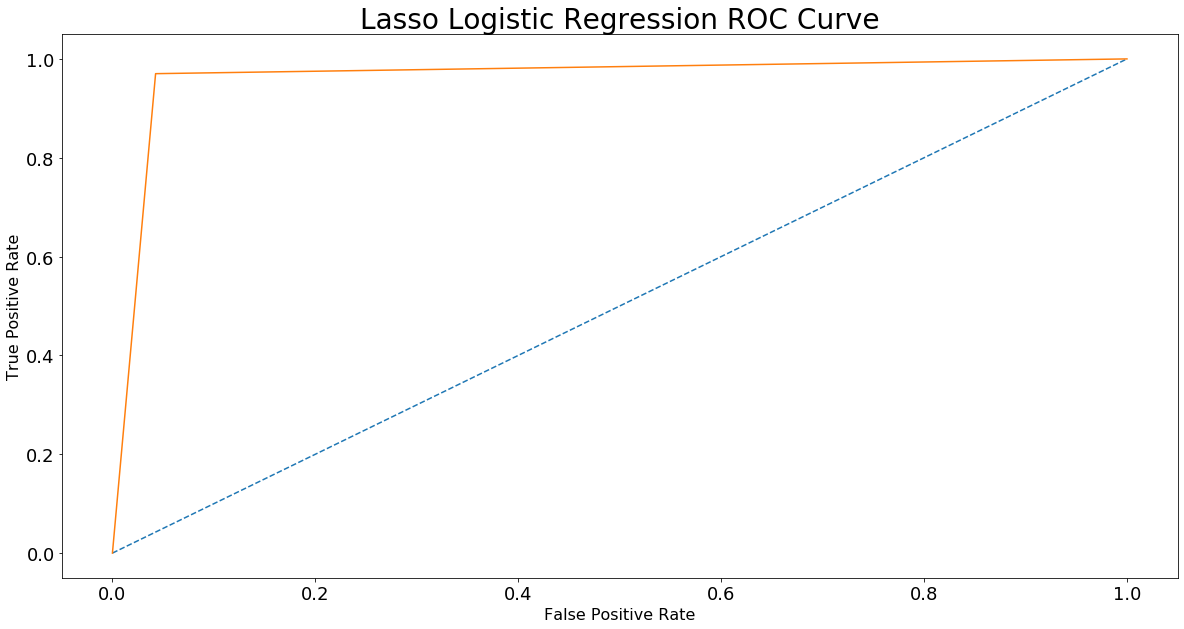

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression ROC Curve', fontsize = 28)
plt.show();

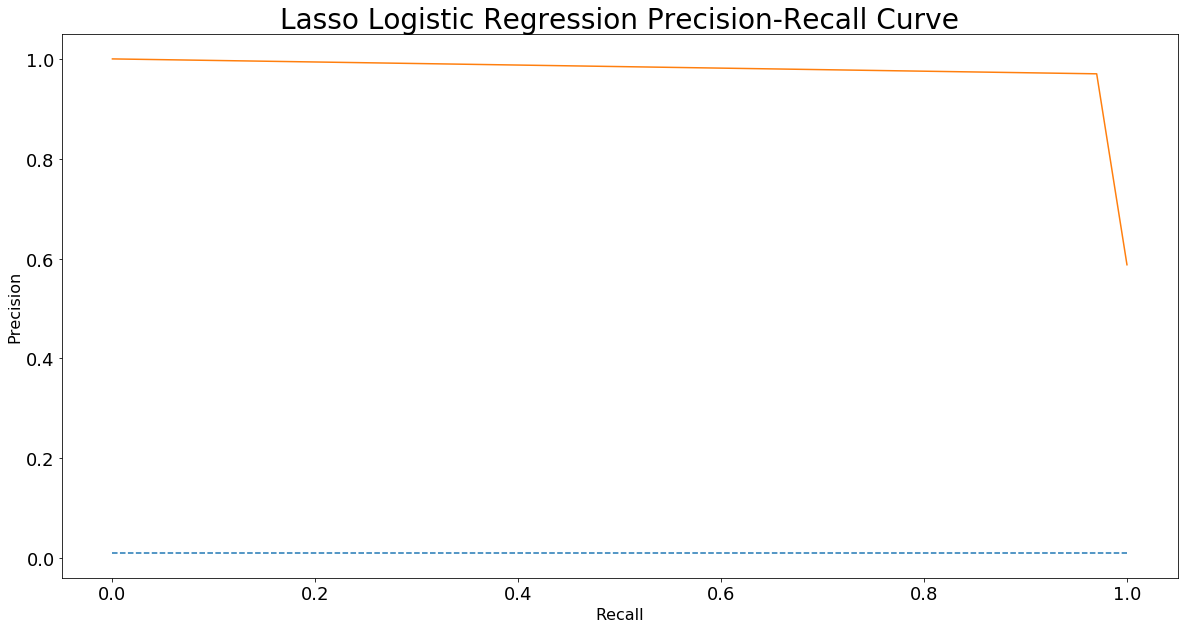

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0.01/0.98, 0.01/0.98], linestyle = '--')
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression Precision-Recall Curve', fontsize = 28)
plt.show();